<h1 align="center",font-size=32>REGRESSION AND TIME SERIES MODEL</h1>
<h2 align="center",font-size=32> GROUP 4</h2>

<h3 align="center",font-size=32>PROBLEM STATEMENT : Predict a computer system activity from system performance measures</h3>
<h4 align="left",font-size=32>MEMBERS:</h4>
<li>Arpan Agrawal - 13MA20012</li>
<li>Ayush Bhargava - 13MA20013</li>
<li>Divesh Hura - 13ME10020</li>
<li>Harshit Khandelwal - 13MA20051</li>
<li>Neeraj Bhukania - 13MA20025</li>
<li>Priyank Yadav - 13MA20031</li>
<li>Satyam Jha - 13MA20036</li>

<h2 align="center">ABOUT THE DATASET</h2>

            
<li>The database consists of a collection of a computer systems activity measures. The data was collected from a Sun Sparcstation 20/712 with 128 Mbytes of memory running in a multi-user university department.</li>
<li>Users would typically be doing a large variety of tasks ranging from accessing the internet, editing files or running very cpu-bound programs.</li>
<li>The data was collected continuously on two separate occasions. On both occassions, system activity was gathered every 5 seconds. The final dataset is taken from both occasions with equal numbers of observations coming from each collection epoch in random order.</li>

The dataset consists of 22 attributes all of which are numerical.
<li>lread - Reads (transfers per second ) between system memory and user memory.</li>
<li>lwrite - Writes (transfers per second) between system memory and user memory.</li>
<li>scall - Number of system calls of all types per second.</li>
<li>sread - Number of system read calls per second.</li>
<li>swrite - Number of system write calls per second.</li>
<li>fork - Number of system fork calls per second.</li>
<li>exec - Number of system exec calls per second.</li>
<li>rchar - Number of characters transferred per second by system read calls.</li>
<li>wchar - Number of characters transfreed per second by system write calls.</li>
<li>pgout - Number of page out requests per second.</li>
<li>ppgout - Number of pages, paged out per second.</li>
<li>pgfree - Number of pages per second placed on the free list.</li>
<li>pgscan - Number of pages checked if they can be freed per second.</li>
<li>atch - Number of page attaches (satisfying a page fault by reclaiming a page in memory) per second.</li>
<li>pgin - Number of page-in requests per second.</li>
<li>ppgin - Number of pages paged in per second.</li>
<li>pflt - Number of page faults caused by protection errors (copy-on-writes).</li>
<li>vflt - Number of page faults caused by address translation.</li>
<li>runqsz - Process run queue size.</li>
<li>freemem - Number of memory pages available to user processes.</li>
<li>freeswap - Number of disk blocks available for page swapping.</li>
<li>usr - Portion of time (%) that cpus run in user mode</li>

We are predicting usr- the portion of time (%) that cpus run in user mode

<h2 align="center">ABOUT THE MODEL</h2>

<li>Since we did not have a test set, we split the entire dataset into training and test with (60:40) ratio.</li>
<li>First we trained our Ordinary Least Squares Regression on the training dataset and found out that we have high condition number due to multicollinearity. We also had a high value of R2   due to said multicollinearity</li>
<li>Then we diagnosed multicollinearity and removed the features contributing to it.</li>
<li>The model was again trained on the new training set and the values for the test set were predicted.</li>
<li>The residuals were calculated and analysed.</li>

<h2 align="center">APPLICATIONS</h2>


<li>
Suppose we are  in a data center where we want to allocate different tasks to different machines in an efficient and fast manner. If we can predict the user percentage before allocating the process to a machine, we will be able to decide whether allocating a specific task to a particular machine is a good decision or not.
</li>
<li>The model can also be used during a software development cycle where we have a goal of making the software lightweight and efficient. If we know the relationship between different type of calls/tasks with user cpu time then we’ll be able to model our software accordingly.
</li>

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# this allows plots to appear directly in the notebook
%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 8)})


In [2]:
# read data into a DataFrame
df=pd.read_csv('comp_data.csv')
df.drop(df.columns[[0,-1,-2,-3]],axis=1,inplace=True)
fields=df.columns

In [3]:
# Handelling the missing values
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(df)
df=imp.transform(df)
df=pd.DataFrame(data=df, columns=fields)
df.isnull().values.any()

False

In [4]:
# Splitting the dataset into train and test data
from sklearn.cross_validation import train_test_split

train, test = train_test_split(df, test_size = 0.3)

In [5]:
train_count=train[fields[-1]].count()
test_count=test[fields[-1]].count()

In [6]:
train.index = range(train_count)
test.index = range(test_count)
# test.isnull().values.any()

In [77]:
Y=train[fields[-1]]
X=train.copy()
X.drop(train.columns[[-1]], axis=1, inplace=True)
features=X.columns
Y.count()
X = pd.DataFrame(X,columns=features)
Y = pd.DataFrame(Y,columns=[fields[-1]])
# X.isnull().values.any()

<h2 align="center">SCATTER PLOTS VS THE DEPENDENT VARIABLE</h2>

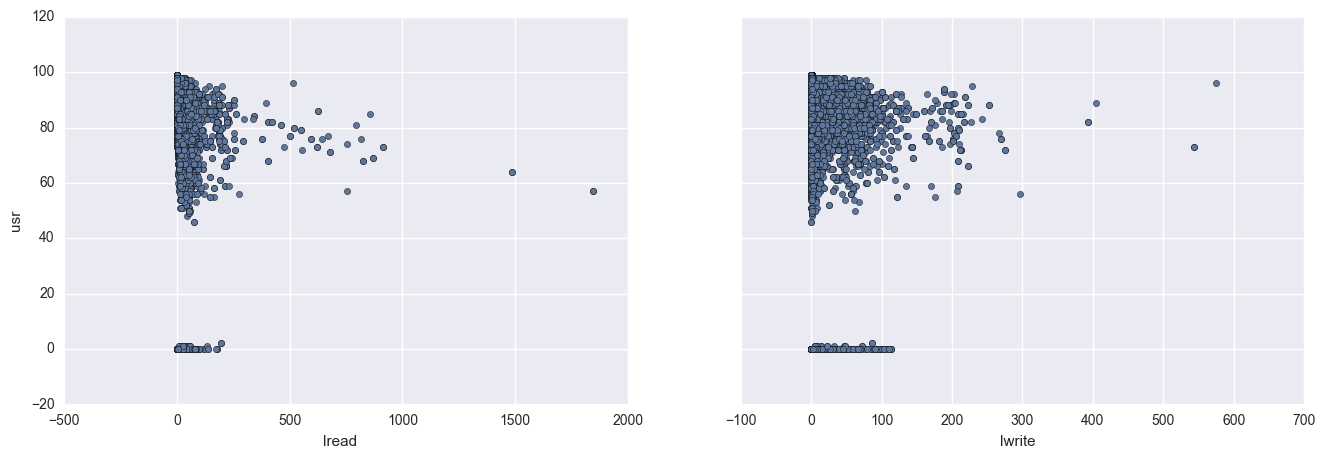

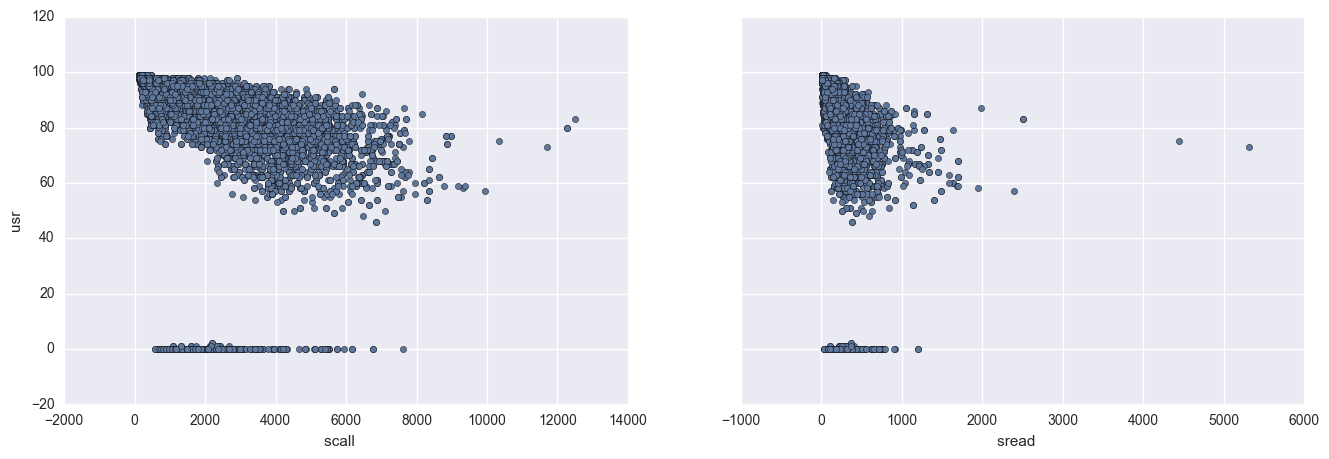

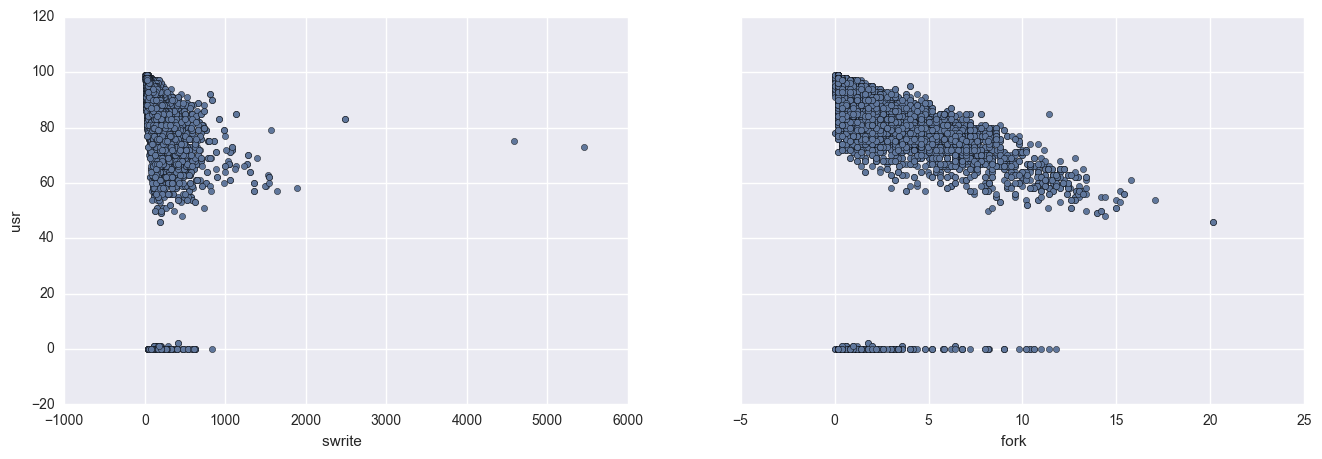

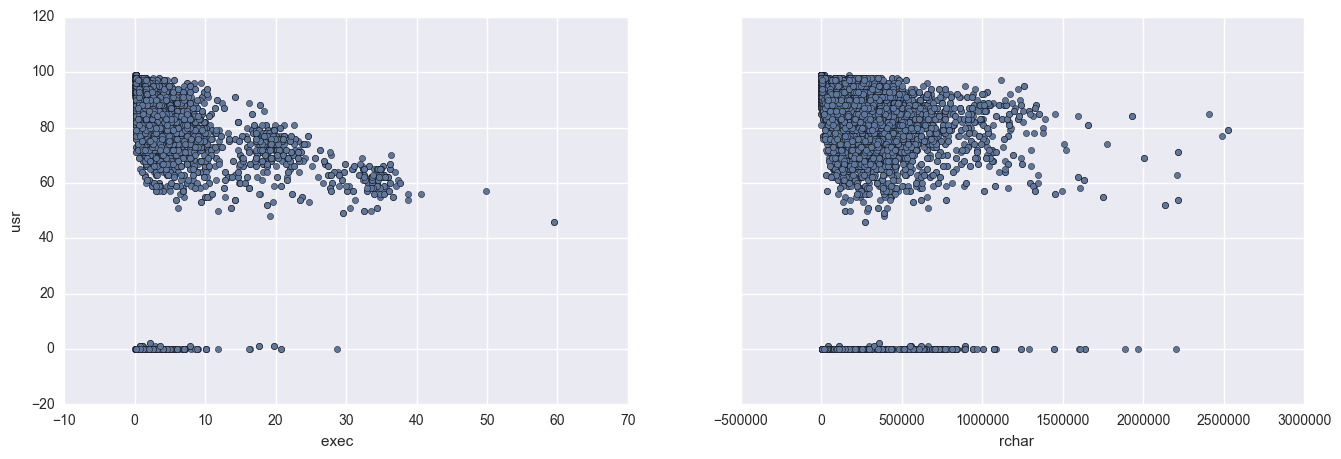

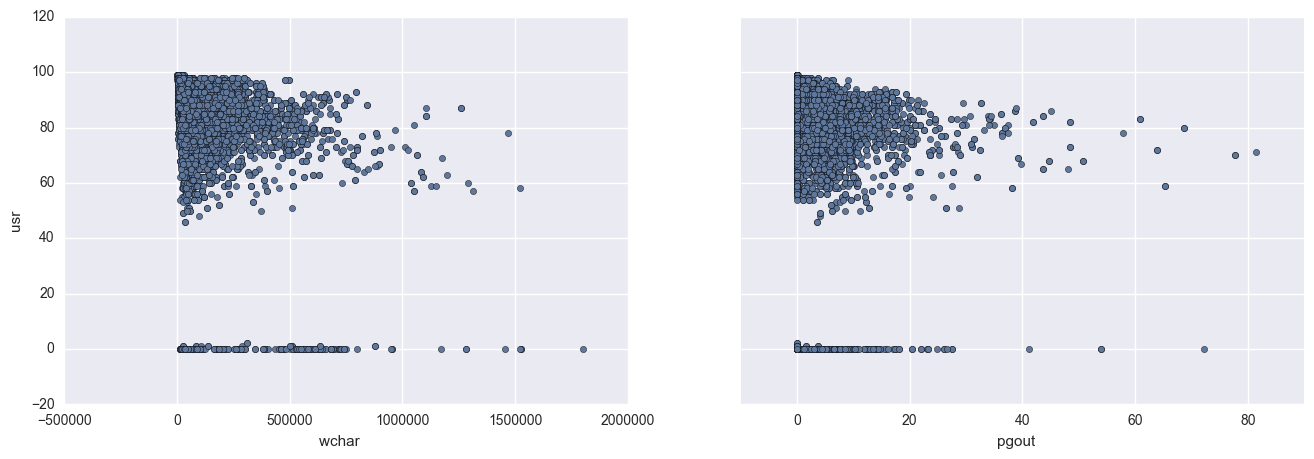

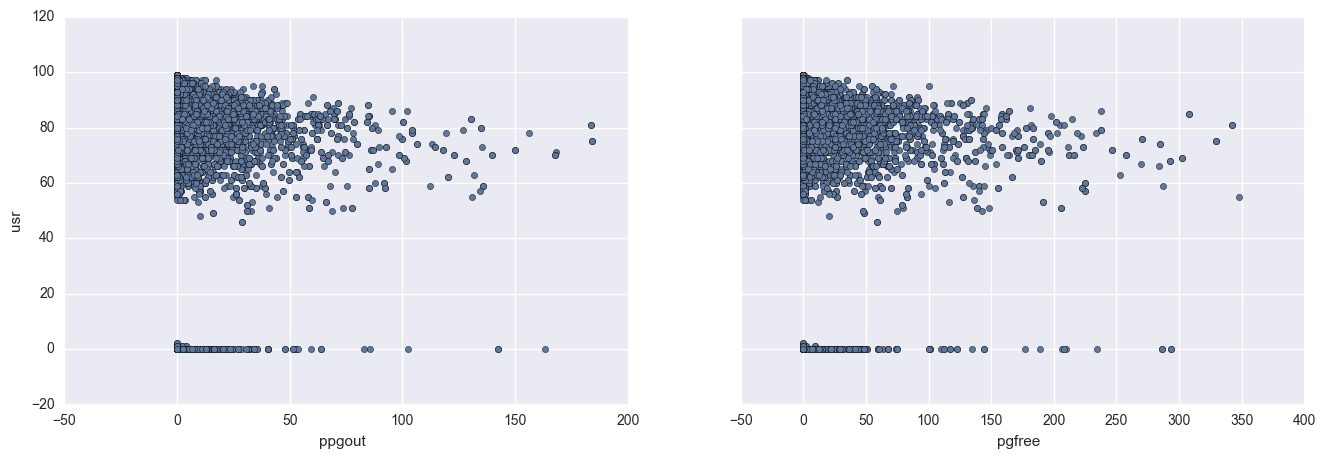

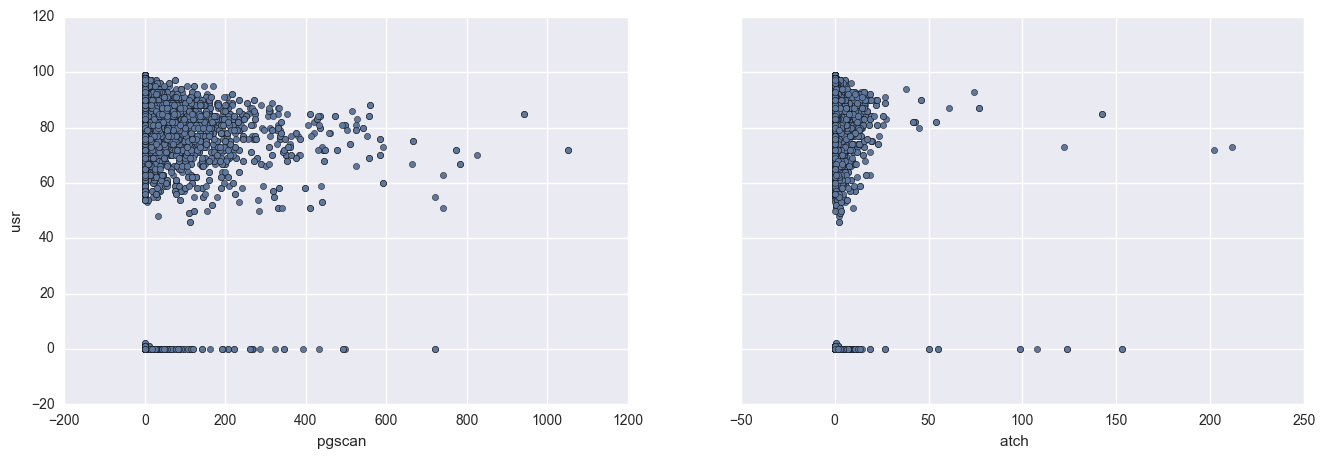

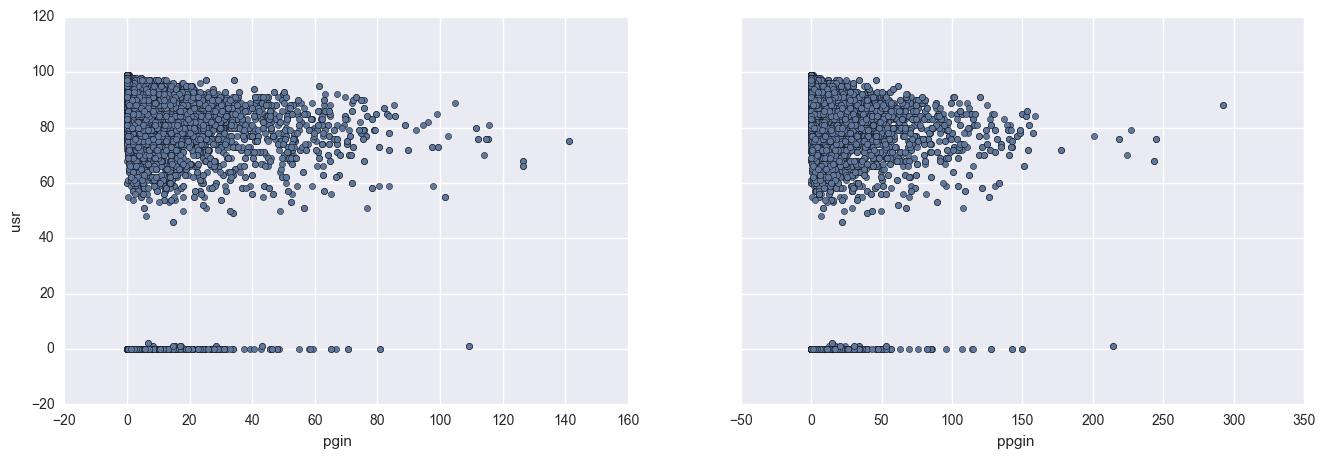

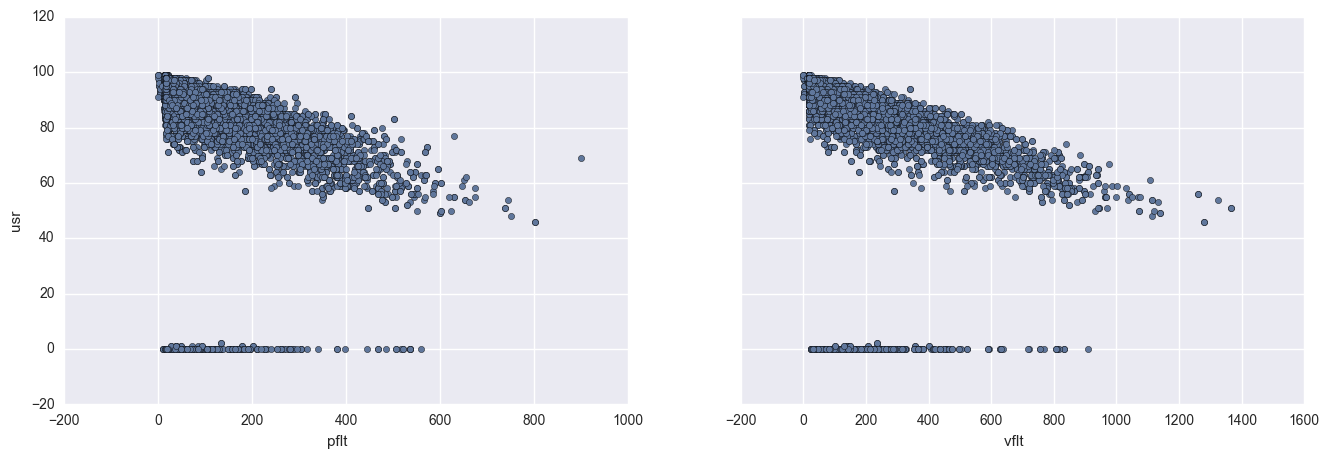

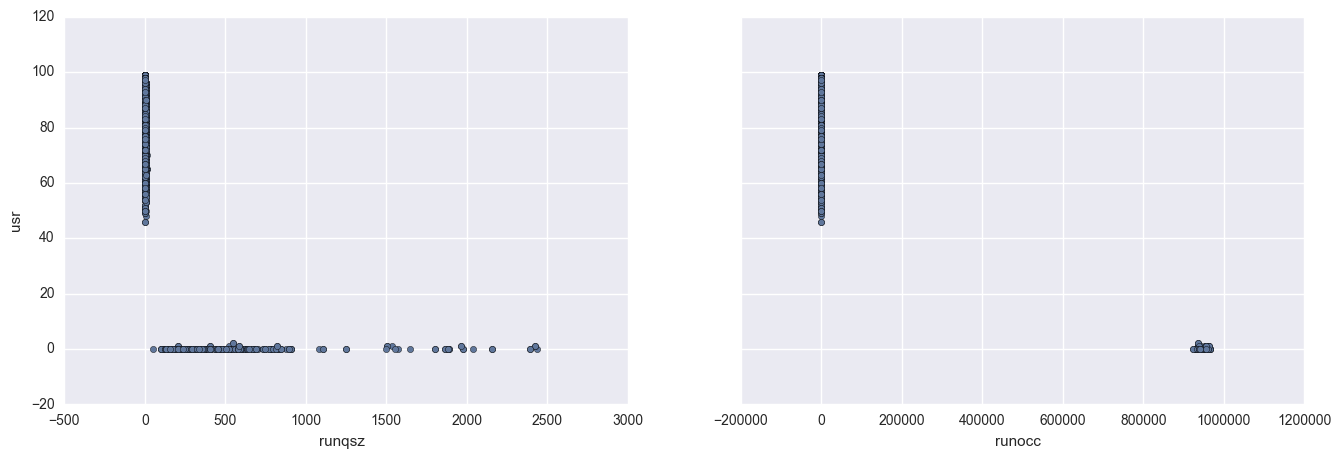

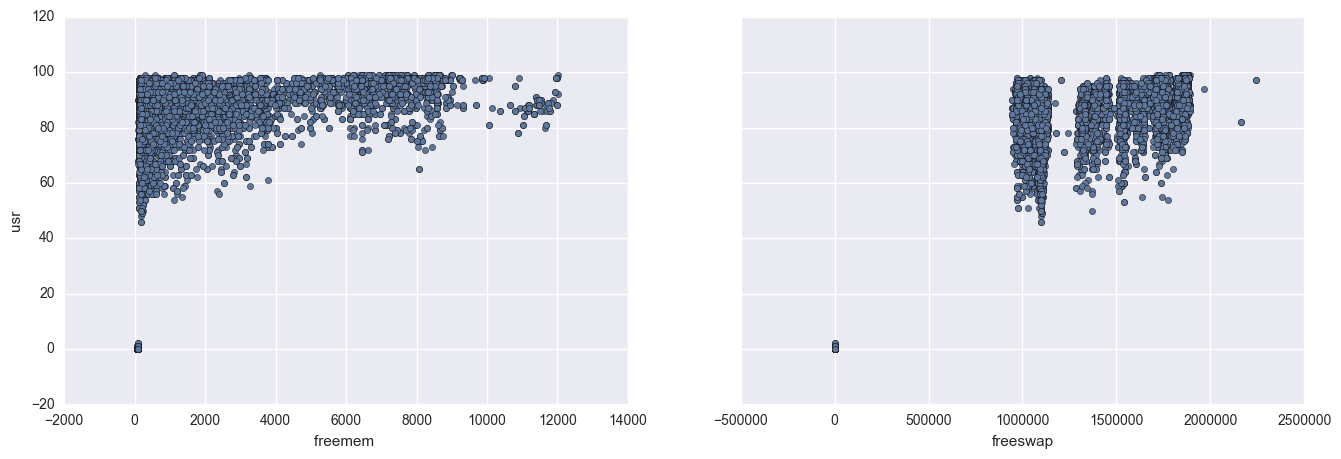

In [8]:
# visualize the relationship between the features and the response using scatterplots
for j in xrange(0,21,2):
    fig, axs = plt.subplots(1, 2, sharey=True)
    for i in xrange(j,j+2):
        train.plot(kind='scatter', x=fields[i], y=fields[-1], ax=axs[i%2],figsize=(16, 5))

In [9]:
import statsmodels.formula.api as sm

model1 = sm.OLS(Y,X).fit()

# print a summary of the fitted model
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               usr        R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                 1.562e+04
Date:                Wed, 02 Nov 2016   Prob (F-statistic):               0.00
Time:                        21:14:33   Log-Likelihood:                -47661.
No. Observations:               11468   AIC:                         9.537e+04
Df Residuals:                   11446   BIC:                         9.553e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
lread         -0.0286      0.003     -9.331      0.000        -0.035    -0.023
lwrite         0.0385      0.006      6.734      0.000         0.027     0.050
scall          0.0029      0.000     21.467      0.000         0.003     0.003
sread          0.0074      0.002      3.888      0.000         0.004     0.011
swrite        -0.0021      0.002     -0.983      0.325        -0.006     0.002
fork          -5.6703      0.245    -23.165      0.000        -6.150    -5.191
exec           0.4050      0.048      8.371      0.000         0.310     0.500
rchar      -4.786e-06   8.62e-07     -5.554      0.000     -6.48e-06  -3.1e-06
wchar       6.745e-07   1.32e-06      0.510      0.610     -1.92e-06  3.27e-06
pgout          0.5582      0.064      8.733      0.000         0.433     0.683
ppgout        -0.1608      0.037     -4.381      0.000        -0.233    -0.089
pgfree        -0.0905      0.019     -4.724      0.000        -0.128    -0.053
pgscan         0.0205      0.006      3.609      0.000         0.009     0.032
atch           0.0039      0.028      0.140      0.888        -0.050     0.058
pgin           0.1376      0.029      4.743      0.000         0.081     0.195
ppgin         -0.0224      0.019     -1.192      0.233        -0.059     0.014
pflt          -0.0610      0.004    -14.268      0.000        -0.069    -0.053
vflt           0.0812      0.003     25.471      0.000         0.075     0.087
runqsz        -0.0045      0.002     -2.529      0.011        -0.008    -0.001
runocc     -7.096e-06   1.22e-06     -5.793      0.000      -9.5e-06  -4.7e-06
freemem       -0.0020    7.5e-05    -26.517      0.000        -0.002    -0.002
freeswap    5.966e-05   2.28e-07    261.372      0.000      5.92e-05  6.01e-05
==============================================================================
Omnibus:                       68.127   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.494
Skew:                           0.067   Prob(JB):                     6.58e-12
Kurtosis:                       2.700   Cond. No.                     2.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<h2 align="center">HYPOTHESIS TESTING AND p-VALUES</h2>
<li>Closely related to confidence intervals is hypothesis testing. Generally speaking, we start with a null hypothesis and an alternative hypothesis (that is opposite of the null). Then, we check whether the data supports rejecting the null hypothesis or failing to reject the null hypothesis.</li>
<li>"Failing to reject" the null is not the same as "accepting" the null hypothesis. The alternative hypothesis may indeed be true, except that you just don't have enough data to show that.</li>
<li>As it relates to model coefficients, here is the conventional hypothesis test:</li>
<ol>
<li>Null hypothesis: There is no relationship between TV ads and Sales (and thus $\beta_1$ equals zero)</li>

<li>Alternative hypothesis: There is a relationship between TV ads and Sales (and thus $\beta_1$ is not equal to zero)</li>
</ol>
<li> How do we test this hypothesis? Intuitively, we reject the null (and thus believe the alternative) if the 95% confidence interval does not include zero. Conversely, the p-value represents the probability that the coefficient is actually zero:</li>

In [10]:
temp = X.copy()
del temp[fields[1]]
model2 = sm.OLS(Y,temp).fit()
model2.rsquared

0.96763142932646529

In [11]:
model1.rsquared

0.96775917840019055

In [12]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, Y)

# print intercept and coefficients
print lm.intercept_
coeff= lm.coef_
print coeff

[ 98.12366887]
[[ -1.10935901e-02  -1.23149160e-03  -1.41430386e-03   8.43526184e-04
   -4.17535133e-03   1.33675749e-01  -2.95050823e-01  -1.64740426e-06
   -4.09352945e-06  -8.33597048e-02   5.49627512e-03  -8.80606651e-03
    3.59111878e-03  -3.47703506e-04  -1.84670757e-02  -3.65541285e-02
   -1.75306952e-02  -1.44755405e-02   2.17333624e-03  -9.22324300e-05
    1.88946965e-04  -5.60751086e-07]]


In [13]:
# pair the feature names with the coefficients
zip(features, coeff[0])

[('lread   ', -0.011093590096031704),
 ('lwrite  ', -0.0012314915994827264),
 ('scall   ', -0.0014143038598433105),
 ('sread   ', 0.00084352618412416062),
 ('swrite  ', -0.0041753513324603048),
 ('fork    ', 0.13367574898667295),
 ('exec    ', -0.29505082324868587),
 ('rchar   ', -1.647404263605684e-06),
 ('wchar   ', -4.0935294523467003e-06),
 ('pgout   ', -0.083359704807577789),
 ('ppgout  ', 0.0054962751238759357),
 ('pgfree  ', -0.0088060665078194596),
 ('pgscan  ', 0.0035911187824309984),
 ('atch    ', -0.00034770350564584295),
 ('pgin    ', -0.018467075749889837),
 ('ppgin   ', -0.036554128485420181),
 ('pflt    ', -0.017530695173340868),
 ('vflt    ', -0.014475540469908565),
 ('runqsz  ', 0.0021733362438675682),
 ('runocc  ', -9.2232430025197126e-05),
 ('freemem ', 0.00018894696491883467),
 ('freeswap', -5.6075108588460321e-07)]

In [14]:
Y_test=test[fields[-1]]
X_test=test.copy()
X_test.drop(test.columns[[-1]], axis=1, inplace=True)
X_test = pd.DataFrame(X_test,columns=features)
Y_test = pd.DataFrame(Y_test,columns=[fields[-1]])

In [15]:
lm.score(X_test,Y_test)

0.97571351852390953

In [16]:
Yp=lm.predict(X_test)
fields[-1]

'usr     '

In [17]:
Yp=pd.DataFrame(Yp,columns=['usr_predicted'])
Res_analysis=pd.DataFrame(Y_test[fields[-1]]-Yp['usr_predicted'],columns=['residual'])

In [18]:
Res_analysis['usr_predicted']=Yp['usr_predicted']
Res_analysis['usr']=Y_test[fields[-1]]
# Res_analysis['usr'].isnull().values.any()
Res_analysis.head()

,residual,usr_predicted,usr
0,-0.265266,80.265266,80.0
1,-7.843839,87.843839,80.0
2,-0.661459,95.661459,95.0
3,-0.122373,74.122373,74.0
4,-1.874207,77.874207,76.0


In [19]:
import scipy.stats as stats

stats.normaltest(Res_analysis['residual'])

NormaltestResult(statistic=541.29019170874869, pvalue=2.886212586466253e-118)

<h2 align="center">MULTICOLLINEARITY DIAGNOSIS</h2>
<li>Examination of the correlation matrix</li>
<li>Variance Inflation Factor calculation</li>
<li>Eigensystem analysis of X'X</li>

In [20]:
temp = np.array(X)
norm_x = np.ones_like(temp)
for i in range(22):
    norm_x[:, i] = temp[:, i] / np.linalg.norm(temp[:, i]) 

norm_xtx = np.dot(norm_x.T, norm_x)


In [78]:
import numpy as np
A  = X.corr()
for j,c in enumerate(A.columns):
    for i, r in enumerate(A.columns):
        if np.abs(A.iloc[i][j]) > 0.7 and i>j:
            print r,c,A.iloc[i][j]

sread    scall    0.700398491102
swrite   sread    0.873570388879
exec     fork     0.763885920498
pflt     fork     0.931813948457
vflt     fork     0.939722499257
ppgout   pgout    0.87794684162
pgfree   pgout    0.741926865203
pgfree   ppgout   0.917191964355
pgscan   ppgout   0.775253559035
pgscan   pgfree   0.908352750651
ppgin    pgin     0.924841908159
vflt     pflt     0.935140203199
runocc   runqsz   0.714765794652


In [79]:
A

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,...,pgscan,atch,pgin,ppgin,pflt,vflt,runqsz,runocc,freemem,freeswap
lread,1.000000,0.499844,0.186200,0.120380,0.113440,0.132223,0.105046,0.099622,0.075593,0.078487,...,0.074096,0.021262,0.184929,0.156250,0.127878,0.152978,0.020741,0.019942,-0.080159,-0.073718
lwrite,0.499844,1.000000,0.146741,0.129631,0.105951,0.041909,0.034465,0.118197,0.093389,0.071242,...,0.052094,0.031432,0.088303,0.088376,0.057747,0.085074,0.040907,0.040706,-0.092730,-0.112223
scall,0.186200,0.146741,1.000000,0.700398,0.625059,0.442940,0.307162,0.356368,0.273215,0.196399,...,0.186445,0.078301,0.244461,0.224441,0.476753,0.530620,-0.000360,-0.016724,-0.387444,-0.355204
sread,0.120380,0.129631,0.700398,1.000000,0.873570,0.419047,0.161758,0.522610,0.412021,0.184068,...,0.205606,0.080848,0.205474,0.214415,0.454318,0.495024,0.050551,0.062005,-0.289673,-0.312201
swrite,0.113440,0.105951,0.625059,0.873570,1.000000,0.384504,0.102439,0.352578,0.406076,0.143721,...,0.124157,0.057862,0.147474,0.147490,0.404338,0.426615,0.017594,0.029097,-0.252867,-0.245162
fork,0.132223,0.041909,0.442940,0.419047,0.384504,1.000000,0.763886,0.286032,0.065020,0.121880,...,0.155465,0.040120,0.165117,0.134270,0.931814,0.939722,-0.018566,-0.018613,-0.115649,-0.125170
exec,0.105046,0.034465,0.307162,0.161758,0.102439,0.763886,1.000000,0.166577,0.003451,0.110812,...,0.148349,0.052763,0.189487,0.153824,0.644817,0.692647,-0.005874,-0.019024,-0.155827,-0.152139
rchar,0.099622,0.118197,0.356368,0.522610,0.352578,0.286032,0.166577,1.000000,0.511981,0.208586,...,0.259357,0.171488,0.292248,0.339194,0.315157,0.365414,0.142271,0.139398,-0.154093,-0.226857
wchar,0.075593,0.093389,0.273215,0.412021,0.406076,0.065020,0.003451,0.511981,1.000000,0.196293,...,0.123419,0.179827,0.169523,0.196099,0.088977,0.114861,0.210907,0.197802,-0.152209,-0.235310
pgout,0.078487,0.071242,0.196399,0.184068,0.143721,0.121880,0.110812,0.208586,0.196293,1.000000,...,0.553282,0.158095,0.379031,0.408805,0.145334,0.218224,-0.012479,0.069502,-0.267905,-0.235812


<h2 align="center">FEATURES PLOT</h2>

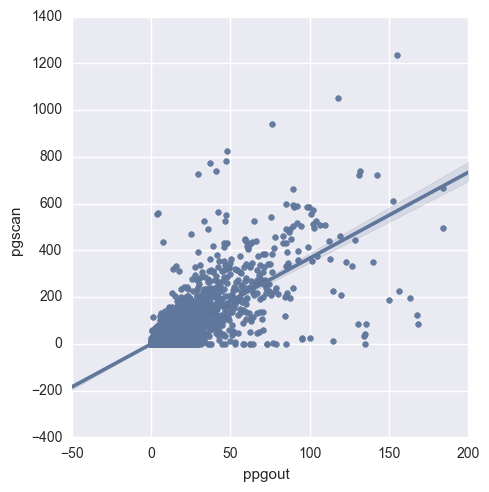

In [22]:
sns.lmplot(x="ppgout  ", y="pgscan  ", data=df);

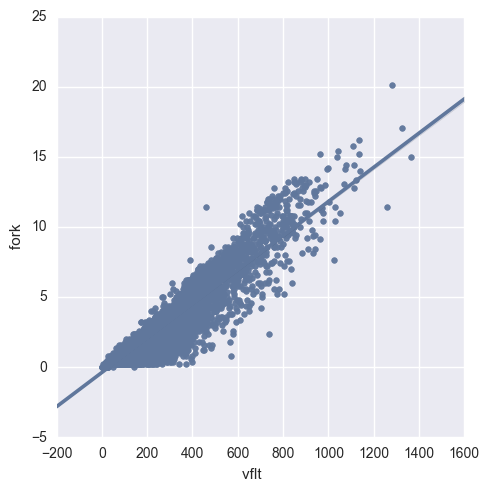

In [23]:
sns.lmplot(x="vflt    ", y="fork    ", data=df);

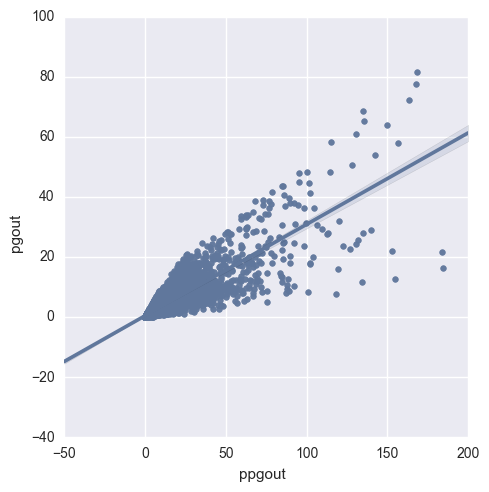

In [24]:
sns.lmplot(x="ppgout  ", y="pgout   ", data=df);

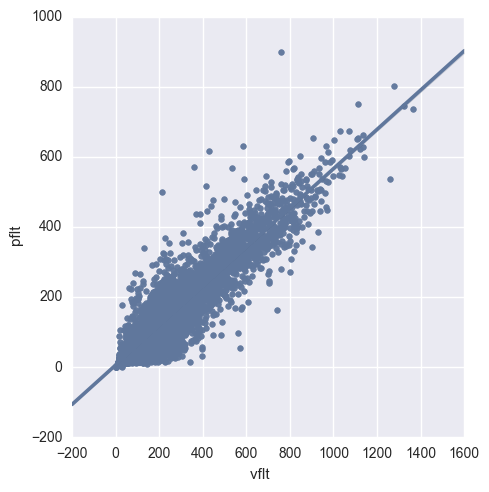

In [25]:
sns.lmplot(x="vflt    ", y="pflt    ", data=df);

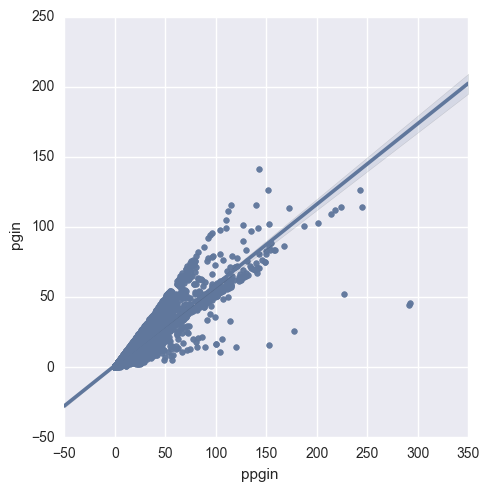

In [26]:
sns.lmplot(x="ppgin   ", y="pgin    ", data=df);

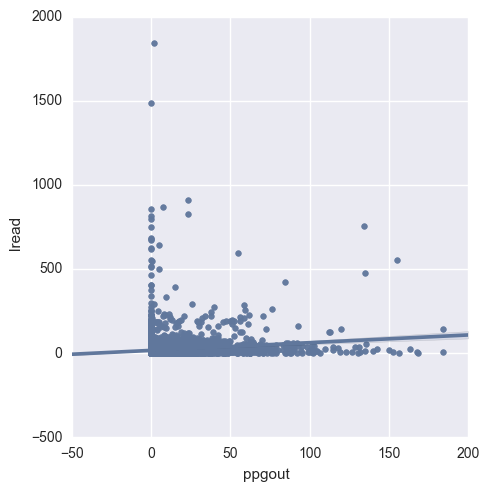

In [27]:
sns.lmplot(x="ppgout  ", y="lread   ", data=df);

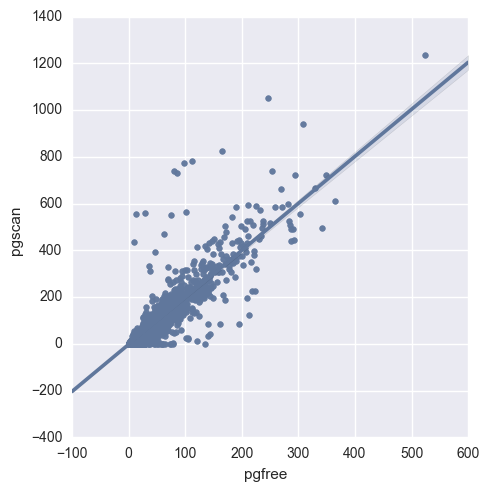

In [28]:
sns.lmplot(x="pgfree  ", y="pgscan  ", data=df);

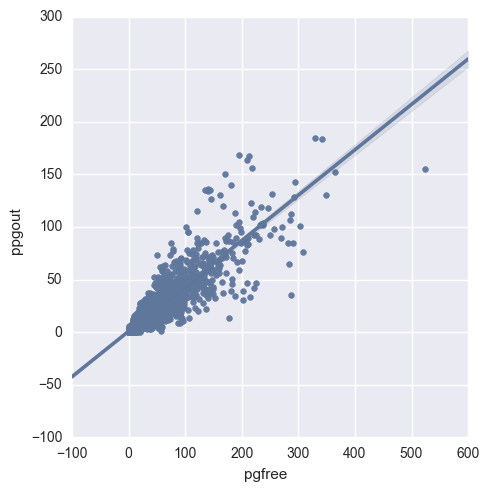

In [29]:
sns.lmplot(x="pgfree  ", y="ppgout  ", data=df);

<h3 align="center">Now with the help of the correlation matrix we have determined that the columns that we might have to remove are :</h3>
<li>sread</li>
<li>fork</li>
<li>pgout</li>
<li>pgscan</li>
<li>pgfree</li>
<li>pgin</li>
<li>pflt</li>
<li>runocc</li>

In [30]:
cols = X.columns
cols

Index([u'lread   ', u'lwrite  ', u'scall   ', u'sread   ', u'swrite  ',
       u'fork    ', u'exec    ', u'rchar   ', u'wchar   ', u'pgout   ',
       u'ppgout  ', u'pgfree  ', u'pgscan  ', u'atch    ', u'pgin    ',
       u'ppgin   ', u'pflt    ', u'vflt    ', u'runqsz  ', u'runocc  ',
       u'freemem ', u'freeswap'],
      dtype='object')

<h2 align="center">VARIANCE INFLATION AFTER CALCULATION<h2 align="center">

In [31]:
norm_xtx = np.matrix(norm_xtx)
C = norm_xtx.I

In [32]:
C = pd.DataFrame(C)
vif = []
for j,c in enumerate(C.columns):
    print "VIF"+str(j+1),C[j][j]
    vif.append(C[j][j])

VIF1 1.58751251399
VIF2 1.62382919176
VIF3 6.99227841578
VIF4 14.143171556
VIF5 9.89999400466
VIF6 27.6634896946
VIF7 3.97363823989
VIF8 3.37416213784
VIF9 2.40864073326
VIF10 6.68554105888
VIF11 16.7400080867
VIF12 19.5741187993
VIF13 7.86782986356
VIF14 1.21432559006
VIF15 10.6399773478
VIF16 11.0406574259
VIF17 21.7888919683
VIF18 34.0486511748
VIF19 2.32245761857
VIF20 2.28638287362
VIF21 2.4785967216
VIF22 4.84353178444


<h3 align="center">The above Variance inflation Factor Analysis indicates that we've got some features due to which multicollinearity arises</h3>

<h2 align="center">EIGENSYSTEM ANALYSIS</h2>

In [33]:
eigs = np.linalg.eigvals(norm_xtx)
maxval = eigs.max()
minval = eigs.min()

In [34]:
eigs

array([ 9.52810342,  2.72937353,  1.87398302,  1.34726453,  1.17229463,
        0.98325583,  0.90949009,  0.81172607,  0.4749721 ,  0.43181803,
        0.41200686,  0.29380294,  0.25623585,  0.24131603,  0.18071844,
        0.11274932,  0.06232307,  0.05221765,  0.04689954,  0.01955172,
        0.03111919,  0.02877814])

In [35]:
condition_number = (eigs.max() / eigs.min())
print condition_number

487.328075494


In [36]:
eigs = list(eigs)
condition_indices = []
for i in range(len(eigs)):
    condition_indices.append(maxval/eigs[i])

In [37]:
condition_indices

[1.0,
 3.4909488606110548,
 5.0844128952842258,
 7.0721845662789971,
 8.1277378107040636,
 9.6903604727004904,
 10.476313575959447,
 11.738077395925204,
 20.060343281854742,
 22.065089116014754,
 23.126079629229782,
 32.43025261824652,
 37.184896626564523,
 39.483922713374,
 52.723471648470586,
 84.506973696341547,
 152.88243456540414,
 182.46900475725261,
 203.15985073455781,
 487.32807549354891,
 306.18100154961047,
 331.08817629130908]

<h3 align="center">The above found Kaapa values indicate that we have 6 features that lead to multicollinearity</h3>

<h2 align="center">SVD DECOMPOSITION</h2>

In [38]:
U, D, Tdash = np.linalg.svd(norm_x)
#X_a = np.dot(np.dot(P, np.diag(D)), Q)
#print(np.std(X), np.std(X_a), np.std(X - X_a))

In [39]:
Ddash = np.zeros_like(Tdash)
for i in range(0,22):
    Ddash[i][i] =D[i] 

In [40]:
A = Ddash*Ddash
A = np.matrix(A)
temp = Tdash.T*A.I*Tdash

In [41]:
temp = pd.DataFrame(temp)

In [42]:
pie = temp.copy()

In [43]:
vif2 = []
for i in range(len(temp.columns)):
    var1 = 0
    for j in range(len(temp.columns)):
        var1 += (temp[j][i]*temp[j][i])
    var1 = var1/(Ddash[i][i]*Ddash[i][i])
    vif2.append(var1)

In [44]:
for i in range(len(temp.columns)):
    for j in range(len(temp.columns)):
        var2 = (temp[j][i]*temp[j][i])/(D[i])/(vif2[j]*D[i])
        pie[i][j] = var2

In [45]:
pie.columns = ['B0','B1','B2','B3','B4','B5','B6','B7','B8','B9','B10','B11','B12','B13','B14','B15','B16','B17',
               'B18','B19','B20','B21']
pie.index = [cols]
dict1 = {}
for j,n in enumerate(pie.columns):
    l1 = []
    for i,m in enumerate(pie.columns):
        if np.abs(pie.iloc[i][j])>0.4:
            l1.append(cols[i])
    if len(l1)>1:
        dict1[n] = l1

<h3 align="center">The pie matrix basically shows us the contribution of each feature in the determination of a coefficient and can help us in identifying multicollinearity</h3>

In [46]:
pie

,B0,B1,B2,B3,B4,B5,B6,B7,B8,B9,...,B12,B13,B14,B15,B16,B17,B18,B19,B20,B21
lread,5.987962e-01,5.119816e-01,1.111421e-01,7.671304e-02,0.005979,0.684074,0.018423,3.836285e-04,6.395309e-04,2.812980e-01,...,4.581126e-02,1.035153e-03,2.388128,8.009704e-01,0.077654,6.380755,0.010107,0.039479,0.006691,0.090572
lwrite,4.121853e-02,6.146821e-01,1.063694e-03,6.708839e-03,0.000002,0.306652,0.007132,4.219387e-03,3.785376e-04,4.141565e-03,...,7.214435e-03,4.127939e-04,0.183159,1.047373e-01,0.004563,4.920736,0.002632,0.039735,0.035494,1.314404
scall,2.087711e-04,2.481821e-05,5.640991e-01,1.634821e-01,0.004848,0.207663,0.022373,1.871884e-03,7.017713e-04,9.370437e-03,...,1.880613e-06,6.179122e-05,0.003182,4.684787e-06,0.178512,4.281842,0.000009,0.001451,0.643058,5.070965
sread,2.086021e-05,2.265994e-05,2.366617e-02,6.463906e-01,0.299656,0.008067,0.000335,3.851932e-02,1.284901e-03,3.213348e-03,...,1.224460e-02,1.952510e-04,0.002292,6.273189e-05,0.002707,0.318973,0.000012,0.003710,0.000028,0.036773
swrite,1.899683e-06,6.080917e-09,8.199772e-04,3.501027e-01,0.488738,0.064384,0.010453,2.122260e-02,1.723073e-02,9.749053e-04,...,7.658082e-03,2.148640e-05,0.000691,4.107540e-04,0.033927,0.248197,0.001558,0.000236,0.006325,0.046476
fork,2.575629e-05,1.434128e-04,4.162429e-03,1.117040e-03,0.007630,0.642864,0.029211,5.349101e-08,1.769315e-04,2.774065e-04,...,4.709851e-06,5.659447e-04,0.026455,5.316770e-03,1.202376,4.242943,0.001245,0.001257,0.002713,0.057419
exec,1.269271e-05,6.103308e-05,8.205937e-03,8.489644e-04,0.022668,0.534531,0.283686,2.318169e-04,1.301572e-03,6.562057e-04,...,1.044440e-03,4.555780e-04,0.015844,1.398294e-03,1.097253,0.064147,0.000235,0.000462,0.048880,0.097872
rchar,4.712795e-07,6.438413e-05,1.224207e-03,1.740190e-01,0.082062,0.000002,0.000413,4.578658e-01,9.158632e-02,4.539226e-04,...,6.983423e-04,3.589019e-03,0.048341,2.502710e-01,0.001242,0.383839,0.000515,0.013522,0.002411,0.087010
wchar,7.154836e-07,5.260282e-06,4.179671e-04,5.286380e-03,0.060676,0.005257,0.002114,8.340672e-02,6.205883e-01,2.610277e-03,...,2.387721e-03,3.106578e-03,0.000770,8.123623e-06,0.024171,0.310879,0.038063,0.034129,0.000486,0.064514
pgout,2.299504e-05,4.205270e-06,4.077893e-04,9.659970e-04,0.000251,0.000602,0.000078,3.020520e-05,1.907287e-04,4.226655e-01,...,5.196865e-02,2.768174e-03,0.004904,1.283009e-02,0.014495,0.000302,0.016189,0.042197,0.019434,0.044320


In [47]:
dict1

{'B1': ['lread   ', 'lwrite  '],
 'B10': ['lread   ', 'pgout   ', 'ppgout  '],
 'B11': ['pgfree  ', 'pgscan  '],
 'B14': ['lread   ', 'pgin    '],
 'B15': ['lread   ', 'pgin    ', 'ppgin   '],
 'B16': ['fork    ', 'exec    ', 'pflt    '],
 'B17': ['lread   ',
  'lwrite  ',
  'scall   ',
  'fork    ',
  'atch    ',
  'vflt    '],
 'B19': ['runqsz  ', 'runocc  '],
 'B20': ['scall   ', 'freemem '],
 'B21': ['lwrite  ', 'scall   ', 'freemem ', 'freeswap'],
 'B5': ['lread   ', 'fork    ', 'exec    ']}

<h3 align="center">The above dict which we have obtained from pie matrix shows us the features that are contributing to multicollinearity and thereby causing errors in the calculation of our coefficients</h3>

<h2 align="center">REMOVING FEATURES CAUSING MULTICOLLINEARITY</h2>

In [48]:
X = X.drop([cols[0],cols[1],cols[2],cols[6],cols[16],cols[20],cols[5],cols[14],cols[12]],axis = 1)
X_test = X_test.drop([cols[0],cols[1],cols[2],cols[6],cols[16],cols[20],cols[5],cols[14],cols[12]],axis = 1)

In [49]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, Y)

# print intercept and coefficients
print lm.intercept_
coeff= lm.coef_
print coeff

[ 93.95872645]
[[ -4.30482578e-03  -3.77133336e-03  -9.19923805e-07  -5.14093664e-06
   -1.04921973e-01  -1.42935888e-02   1.50846732e-02   7.83651417e-03
   -4.92205805e-02  -3.27668443e-02   1.99879197e-03  -8.84971448e-05
    1.47239382e-06]]


In [50]:
zip(features, coeff[0])

[('lread   ', -0.0043048257766463913),
 ('lwrite  ', -0.0037713333643792308),
 ('scall   ', -9.1992380459900627e-07),
 ('sread   ', -5.1409366368716948e-06),
 ('swrite  ', -0.10492197310062235),
 ('fork    ', -0.014293588770814637),
 ('exec    ', 0.015084673156489157),
 ('rchar   ', 0.00783651416708692),
 ('wchar   ', -0.049220580489971688),
 ('pgout   ', -0.032766844323799366),
 ('ppgout  ', 0.0019987919726623116),
 ('pgfree  ', -8.8497144751537027e-05),
 ('pgscan  ', 1.4723938150384974e-06)]

In [51]:
lm.score(X_test,Y_test)

0.96191867174916323

<h2 align="center">We can see here that even though our R squared value has reduced, our accuracy has improved after removing multicollinearity</h2>

In [52]:
Yp=lm.predict(X_test)
fields[-1]
Yp=pd.DataFrame(Yp,columns=['usr_predicted'])
Res_analysis2=pd.DataFrame(Y_test[fields[-1]]-Yp['usr_predicted'],columns=['residual'])

In [53]:
Res_analysis2['usr_predicted']=Yp['usr_predicted']
Res_analysis2['usr']=Y_test[fields[-1]]
# Res_analysis['usr'].isnull().values.any()
Res_analysis2[:20]

,residual,usr_predicted,usr
0,0.418708,79.581292,80.0
1,-11.182812,91.182812,80.0
2,0.437832,94.562168,95.0
3,-6.928586,80.928586,74.0
4,1.502158,74.497842,76.0
5,-1.666005,91.666005,90.0
6,-0.875705,92.875705,92.0
7,5.244984,87.755016,93.0
8,4.132975,78.867025,83.0
9,4.022905,88.977095,93.0


In [54]:
Res_analysis[:20]

,residual,usr_predicted,usr
0,-0.265266,80.265266,80.0
1,-7.843839,87.843839,80.0
2,-0.661459,95.661459,95.0
3,-0.122373,74.122373,74.0
4,-1.874207,77.874207,76.0
5,-1.787288,91.787288,90.0
6,0.685464,91.314536,92.0
7,3.231315,89.768685,93.0
8,1.350629,81.649371,83.0
9,2.532412,90.467588,93.0


In [55]:
Res_analysis_plot=Res_analysis[Res_analysis['usr_predicted']>10]
Res_analysis2_plot=Res_analysis2[Res_analysis2['usr_predicted']>10]
usr_predicted2=Res_analysis2_plot['usr_predicted']
usr2=Res_analysis2_plot['usr']
usr_predicted=Res_analysis_plot['usr_predicted']
usr=Res_analysis_plot['usr']

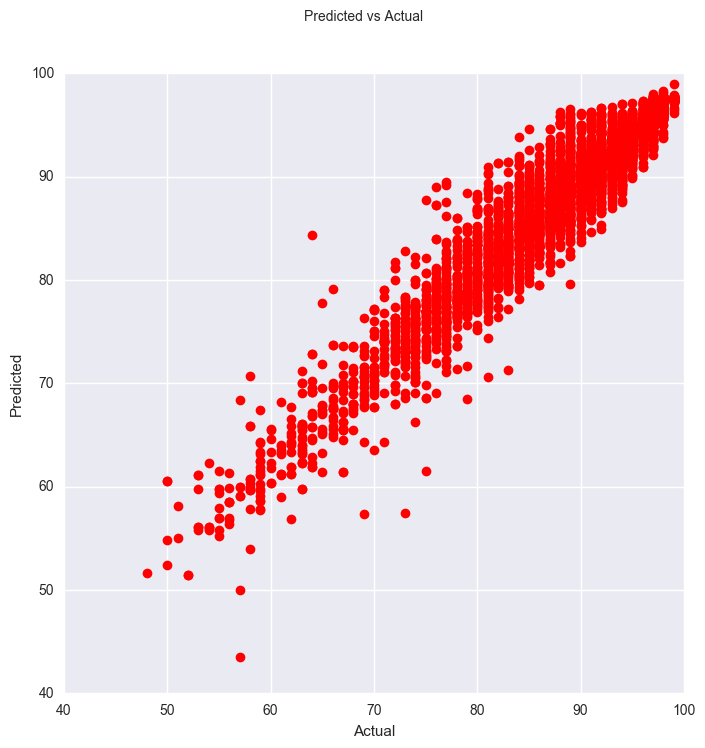

In [56]:
fig = plt.figure()
plt.plot(usr,usr_predicted,'ro')
fig.suptitle('Predicted vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
fig.savefig('Predicted vs Actual1.jpg')

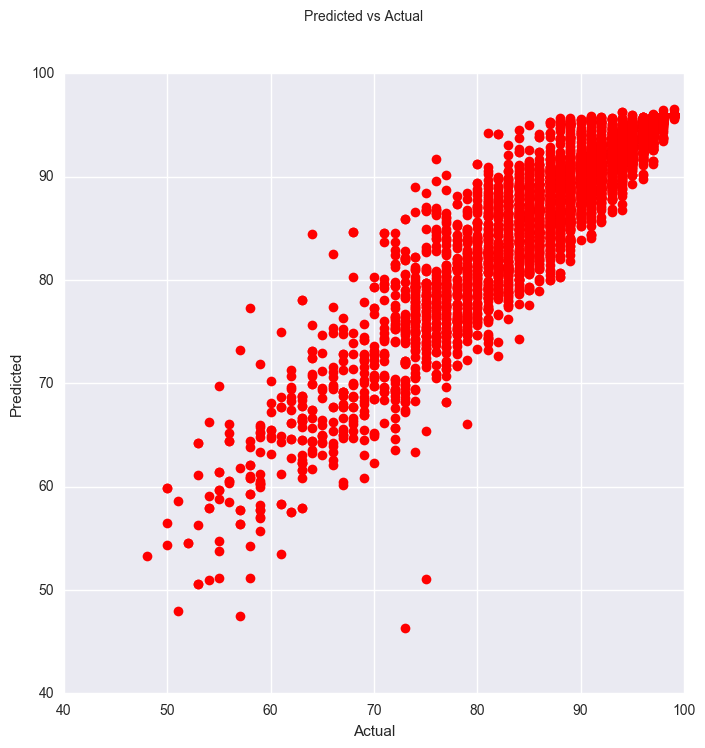

In [57]:
fig = plt.figure()
plt.plot(usr2,usr_predicted2,'ro')
fig.suptitle('Predicted vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
fig.savefig('Predicted vs Actual2.jpg')

In [58]:
from sklearn.preprocessing import scale
Xtrain_scaled = scale(X)
Ytrain_scaled = scale(Y)

In [59]:
Xtest_scaled = scale(X_test)
Ytest_scaled = scale(Y_test)

In [60]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(Xtrain_scaled, Ytrain_scaled)

# print intercept and coefficients
print lm.intercept_
coeff= lm.coef_
print coeff

[ -1.06243473e-15]
[[-0.04603752 -0.03207268 -0.01193862 -0.0393114  -0.03079838 -0.01170754
   0.02577205  0.00242287 -0.0601881  -0.33899695  0.01325674 -0.84710036
   0.03389094]]


In [61]:
zip(features, coeff[0])

[('lread   ', -0.046037524911324332),
 ('lwrite  ', -0.032072677185106313),
 ('scall   ', -0.011938615749642306),
 ('sread   ', -0.039311400355509618),
 ('swrite  ', -0.030798379328181025),
 ('fork    ', -0.011707539628235453),
 ('exec    ', 0.025772047174918572),
 ('rchar   ', 0.0024228686319242299),
 ('wchar   ', -0.060188104632755021),
 ('pgout   ', -0.33899695029064453),
 ('ppgout  ', 0.013256739122395833),
 ('pgfree  ', -0.84710036110881148),
 ('pgscan  ', 0.033890939088007943)]

In [62]:
lm.score(Xtest_scaled,Ytest_scaled)

0.9618685673754388

In [63]:
Yp=lm.predict(Xtest_scaled)
fields[-1]
Yp=pd.DataFrame(Yp,columns=['usr_predicted'])
Ytest_scaled = pd.DataFrame(Ytest_scaled,columns=[fields[-1]])
Res_analysis3 = pd.DataFrame(Ytest_scaled[fields[-1]]-Yp['usr_predicted'],columns=['residual'])

<h2 align="center">RESIDUAL ANALYSIS</h2>

In [64]:
Res_analysis3['usr_predicted']=Yp['usr_predicted']
Res_analysis3['usr']=Ytest_scaled[fields[-1]]
# Res_analysis['usr'].isnull().values.any()
Res_analysis3[:20]

,residual,usr_predicted,usr
0,0.015328,-0.219481,-0.204153
1,-0.596941,0.392787,-0.204153
2,0.026379,0.572619,0.598998
3,-0.370568,-0.154846,-0.525414
4,0.090555,-0.508882,-0.418327
5,-0.088643,0.419924,0.331281
6,-0.045672,0.484040,0.438368
7,0.291939,0.199972,0.491911
8,0.219437,-0.262960,-0.043523
9,0.219235,0.272676,0.491911


In [65]:
residual3=Res_analysis3['residual']
usr_predicted3=Res_analysis3['usr_predicted']
Res_analysis3_sorted=Res_analysis3.sort_values(['residual'],ascending=['True'])

In [66]:
Res_analysis3_plot=Res_analysis3[Res_analysis3['usr_predicted']>-3]

In [67]:
residual3_plot=Res_analysis3_plot['residual']
usr_predicted3_plot=Res_analysis3_plot['usr_predicted']

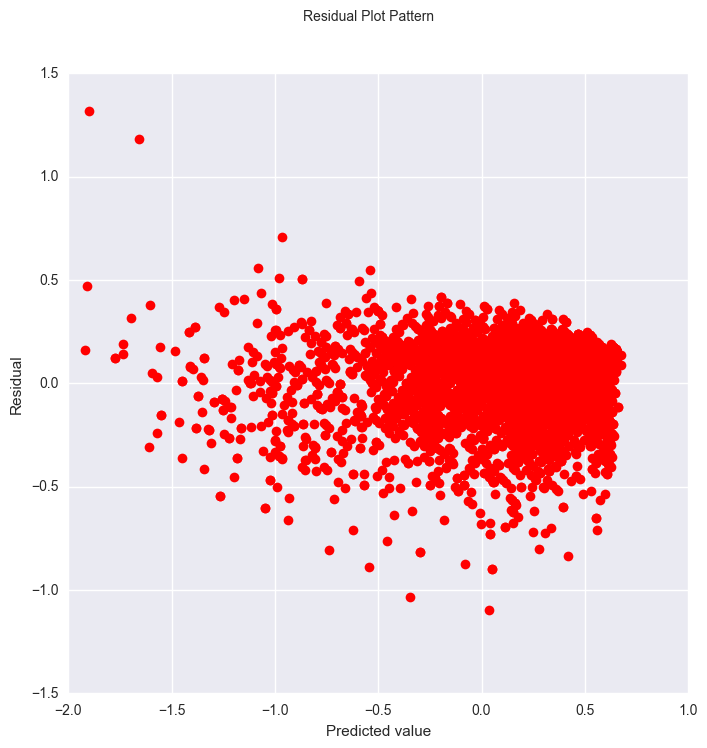

In [68]:
fig = plt.figure()
plt.plot(usr_predicted3_plot,residual3_plot,'ro')
fig.suptitle('Residual Plot Pattern')
plt.xlabel('Predicted value')
plt.ylabel('Residual')
fig.savefig('Residual Plot Pattern.jpg')

In [69]:
n=4916
Prob=[];
index=[];
for i in range(0,n):
    index.append(i)
    Prob.append((i+1-0.5)/n)
Prob=np.array(Prob)
Res_analysis.index=index
Res_analysis['Prob']=Prob
Prob=Res_analysis['Prob']
Sorted_residual3=Res_analysis3_sorted['residual']

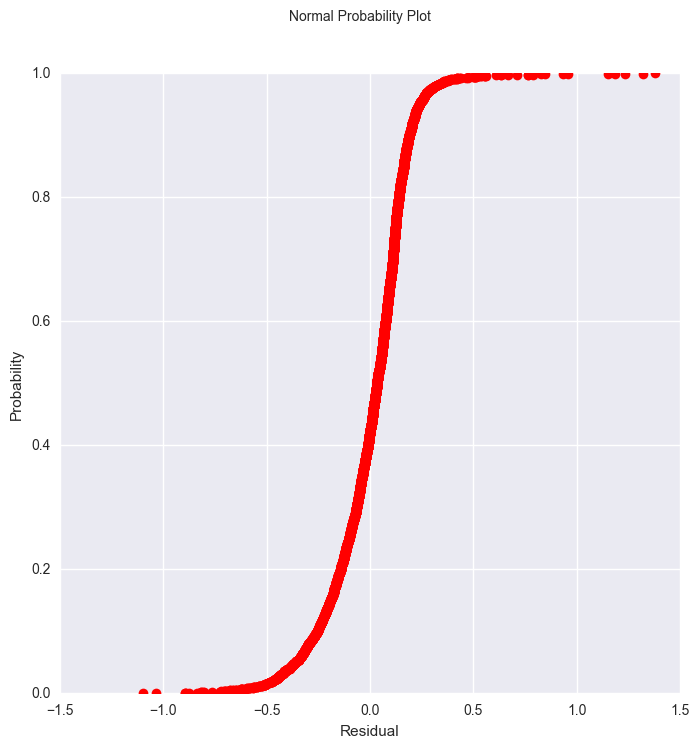

In [70]:
fig = plt.figure()
plt.plot(Sorted_residual3,Prob,'ro')
fig.suptitle('Normal Probability Plot')
plt.xlabel('Residual')
plt.ylabel('Probability')
fig.savefig('Normal Probability Plot.jpg')

In [71]:
residual3.mean()

1.3411882580027293e-15

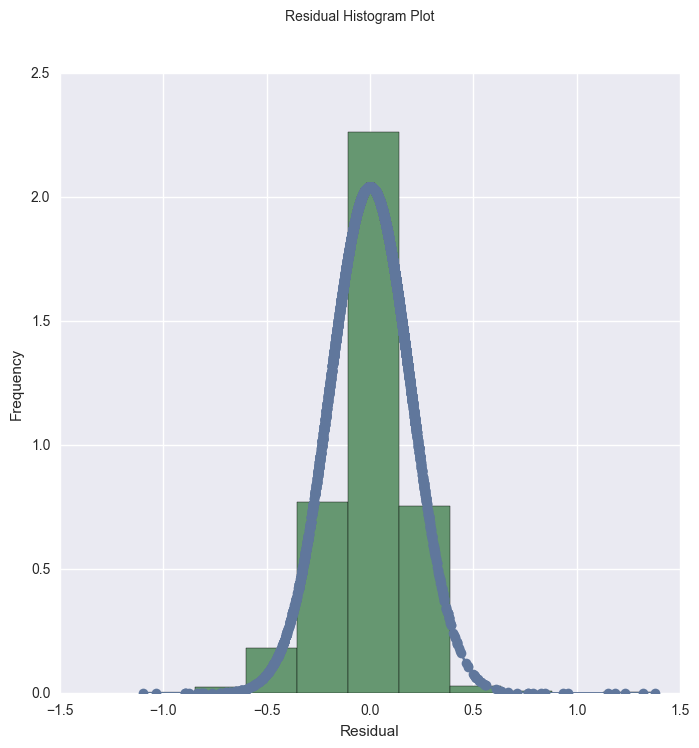

In [72]:
import scipy.stats as stats
import pylab as pl
h=sorted(Res_analysis3['residual'])
fit = stats.norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed
fig = pl.figure()
pl.plot(h,fit,'-o')
fig.suptitle('Residual Histogram Plot')
pl.xlabel('Residual')
pl.ylabel('Frequency')

pl.hist(h,normed=True)      #use this to draw histogram of your data

pl.show()
fig.savefig('Residual Histogram Plot.jpg')

In [80]:
final_model = sm.OLS(Ytrain_scaled,Xtrain_scaled).fit()

# print a summary of the fitted model
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                 2.155e+04
Date:                Wed, 02 Nov 2016   Prob (F-statistic):               0.00
Time:                        21:37:15   Log-Likelihood:                 2289.5
No. Observations:               11468   AIC:                            -4553.
Df Residuals:                   11455   BIC:                            -4458.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            -0.0460      0.004    -10.283      0.000        -0.055    -0.037
x2            -0.0321      0.004     -7.880      0.000        -0.040    -0.024
x3            -0.0119      0.003     -4.577      0.000        -0.017    -0.007
x4            -0.0393      0.002    -16.600      0.000        -0.044    -0.035
x5            -0.0308      0.004     -7.268      0.000        -0.039    -0.022
x6            -0.0117      0.007     -1.676      0.094        -0.025     0.002
x7             0.0258      0.005      4.995      0.000         0.016     0.036
x8             0.0024      0.002      1.220      0.223        -0.001     0.006
x9            -0.0602      0.002    -24.711      0.000        -0.065    -0.055
x10           -0.3390      0.002   -149.692      0.000        -0.343    -0.335
x11            0.0133      0.003      4.758      0.000         0.008     0.019
x12           -0.8471      0.003   -272.688      0.000        -0.853    -0.841
x13            0.0339      0.003     13.055      0.000         0.029     0.039
==============================================================================
Omnibus:                     1532.638   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13301.242
Skew:                          -0.354   Prob(JB):                         0.00
Kurtosis:                       8.228   Cond. No.                         9.69
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""